In [3]:
from google.colab import drive
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.corpus.reader.wordnet import NOUN
from nltk.corpus import wordnet

from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

nltk.download('stopwords')
STOP_WORDS = list(stopwords.words('english'))

import re

import sklearn
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
reviews_df = pd.read_csv('/amzn_dataset.csv')

In [7]:
reviews_df

,Unnamed: 0,category,rating,label,text_,sentiment,semantic_relevance,word_count,character_count,capitalized_count,exclamation_question_count,punctuation_count,pos_counts,readability,PC1,PC2
0,0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",Positive,High Relevance,12,75,4,2,5,"Counter({'.': 3, 'RB': 3, ',': 2, 'JJ': 2, 'PR...","{'flesch_reading_ease': 90.77, 'flesch_kincaid...",-0.973325,1.159860
1,1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",Positive,High Relevance,16,80,1,0,3,"Counter({'DT': 3, 'NN': 3, 'IN': 3, 'PRP': 2, ...","{'flesch_reading_ease': 88.74, 'flesch_kincaid...",-1.36343,0.483875
2,2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,Positive,High Relevance,14,67,2,0,2,"Counter({'NN': 5, 'DT': 3, '.': 2, 'VBD': 1, '...","{'flesch_reading_ease': 106.67, 'flesch_kincai...",-1.407491,0.492609
3,3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",Positive,Low Relevance,17,81,2,1,2,"Counter({'NN': 3, 'PRP': 3, 'IN': 2, 'DT': 2, ...","{'flesch_reading_ease': 79.6, 'flesch_kincaid_...",-1.028412,-2.215124
4,4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,Positive,High Relevance,18,85,3,0,2,"Counter({'RB': 3, 'JJ': 2, 'NN': 2, '.': 2, 'V...","{'flesch_reading_ease': 104.64, 'flesch_kincai...",-1.326179,0.489208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37675,37675,Clothing_Shoes_and_Jewelry_5,4.0,OR,Like the look and the ease of care. comes out ...,Positive,High Relevance,21,97,1,0,2,"Counter({'NN': 5, 'IN': 4, 'CC': 3, 'DT': 2, '...","{'flesch_reading_ease': 103.12, 'flesch_kincai...",-1.2898898800386236,-0.282200
37676,37676,Clothing_Shoes_and_Jewelry_5,5.0,OR,I like that is reasonably priced and tagless. ...,Positive,High Relevance,21,109,2,0,2,"Counter({'PRP': 3, 'VBP': 3, 'DT': 2, 'CC': 2,...","{'flesch_reading_ease': 94.66, 'flesch_kincaid...",-1.296806337477186,0.477564
37677,37677,Clothing_Shoes_and_Jewelry_5,3.0,OR,Compared to the size 10 reef slippers i bought...,Neutral,Medium Relevance,21,105,1,0,2,"Counter({'DT': 3, 'NN': 3, 'TO': 2, 'CC': 2, '...","{'flesch_reading_ease': 84.0, 'flesch_kincaid_...",-1.228310165503903,-1.041531
37678,37678,Clothing_Shoes_and_Jewelry_5,4.0,OR,Hubby said they are a little higher than what ...,Positive,High Relevance,21,105,1,0,2,"Counter({'PRP': 4, 'RB': 3, 'DT': 2, 'IN': 2, ...","{'flesch_reading_ease': 84.0, 'flesch_kincaid_...",-1.278628318076488,-0.283666


In [5]:
reviews_df.label.value_counts()

CG    8486
OR    8475
Name: label, dtype: int64

In [6]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

def lemmatize_text(text, lemmatizer):
    """Lemmatize verbs, then re-lemmatize the result."""
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return " ".join([lemmatizer.lemmatize(word) for word in lemmatized_words])

def stem_text(text, stemmer):
    """Stem the text."""
    return " ".join([stemmer.stem(word) for word in text.split()])

def remove_noise(text):
    """Remove unwanted characters and HTML tags from the text."""
    punctuations = """!\"#$%&'()*+/:;<=>?@[\\]^_.`{|}~"""
    words = text.split()
    cleaned_words = []

    for word in words:
        word = re.sub("(<.*?>)", "", word)

        if '-' not in word:
            word = re.sub("(\\W|\\d)", " ", word)
        else:
            word = ''.join([char for char in word if char not in punctuations])

        cleaned_words.append(word.strip())

    return " ".join(cleaned_words)

reviews_df["text_"] = reviews_df['text_'].str.lower()

lemmatizer = WordNetLemmatizer()
reviews_df["lemmatized_text"] = reviews_df["text_"].apply(lambda x: lemmatize_text(x, lemmatizer))

stemmer = PorterStemmer()
reviews_df["stemmed_text"] = reviews_df["lemmatized_text"].apply(lambda x: stem_text(x, stemmer))

reviews_df["cleaned_text"] = reviews_df["stemmed_text"].apply(remove_noise)

reviews_df['CleanedText'] = reviews_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in STOP_WORDS]))


In [7]:
'''
4. Get all the extra features.
	1. Semantic Relevance( Too negative or too positive)
	2. Word count
	3. character count
	4. Number of capitalized letters.
	5. Number of exclamation points or question marks.
	6. Punctuation count
	7. Part of speech count
	8. Readability metrics
		1. Flesch-Kincaid Grade Level or Automated Readability Index
		2. information about the readability and complexity of the text.
5. Perform PCA
'''

'\n4. Get all the extra features.\n\t1. Semantic Relevance( Too negative or too positive)\n\t2. Word count\n\t3. character count\n\t4. Number of capitalized letters.\n\t5. Number of exclamation points or question marks.\n\t6. Punctuation count\n\t7. Part of speech count\n\t8. Readability metrics\n\t\t1. Flesch-Kincaid Grade Level or Automated Readability Index\n\t\t2. information about the readability and complexity of the text.\n5. Perform PCA\n'

In [8]:
from textblob import TextBlob

def categorize_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

reviews_df['sentiment'] = reviews_df['text_'].apply(categorize_sentiment)

reviews_df.head()

,Unnamed: 0,category,rating,label,text_,sentiment,semantic_relevance,word_count,character_count,capitalized_count,exclamation_question_count,punctuation_count,pos_counts,readability,PC1,PC2,lemmatized_text,stemmed_text,cleaned_text,CleanedText
0,0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...",Positive,High Relevance,12.0,75.0,4.0,2.0,5.0,"Counter({'.': 3, 'RB': 3, ',': 2, 'JJ': 2, 'PR...","{'flesch_reading_ease': 90.77, 'flesch_kincaid...",-0.973325,1.159860,"love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...
1,1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...",Positive,High Relevance,16.0,80.0,1.0,0.0,3.0,"Counter({'DT': 3, 'NN': 3, 'IN': 3, 'PRP': 2, ...","{'flesch_reading_ease': 88.74, 'flesch_kincaid...",-1.363430,0.483875,"love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,Positive,High Relevance,14.0,67.0,2.0,0.0,2.0,"Counter({'NN': 5, 'DT': 3, '.': 2, 'VBD': 1, '...","{'flesch_reading_ease': 106.67, 'flesch_kincai...",-1.407491,0.492609,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow
3,3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",Positive,Low Relevance,17.0,81.0,2.0,1.0,2.0,"Counter({'NN': 3, 'PRP': 3, 'IN': 2, 'DT': 2, ...","{'flesch_reading_ease': 79.6, 'flesch_kincaid_...",-1.028412,-2.215124,"miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,Positive,High Relevance,18.0,85.0,3.0,0.0,2.0,"Counter({'RB': 3, 'JJ': 2, 'NN': 2, '.': 2, 'V...","{'flesch_reading_ease': 104.64, 'flesch_kincai...",-1.326179,0.489208,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month


In [9]:
discrepancy_df = reviews_df[((reviews_df['sentiment'] == 'Positive') & (reviews_df['rating'] < 3)) |
                            ((reviews_df['sentiment'] == 'Negative') & (reviews_df['rating'] > 3))]

discrepancy_df.head()

,Unnamed: 0,category,rating,label,text_,sentiment,semantic_relevance,word_count,character_count,capitalized_count,exclamation_question_count,punctuation_count,pos_counts,readability,PC1,PC2,lemmatized_text,stemmed_text,cleaned_text,CleanedText
3,3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",Positive,Low Relevance,17.0,81.0,2.0,1.0,2.0,"Counter({'NN': 3, 'PRP': 3, 'IN': 2, 'DT': 2, ...","{'flesch_reading_ease': 79.6, 'flesch_kincaid_...",-1.028412,-2.215124,"miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price
10,10,Home_and_Kitchen_5,5.0,CG,as advertised. 5th one i've had. the only prob...,Negative,Low Relevance,15.0,75.0,3.0,0.0,4.0,"Counter({'IN': 2, 'VBN': 2, '.': 2, 'CD': 2, '...","{'flesch_reading_ease': 80.78, 'flesch_kincaid...",-1.287277,0.493881,a advertised. 5th one i've had. the only probl...,a advertised. 5th one i'v had. the onli proble...,a advertised th one i v had the onli problem b...,advertised th one v onli problem realli
41,41,Home_and_Kitchen_5,2.0,CG,sheet color is nice buy for my size for my tow...,Positive,Low Relevance,11.0,49.0,37.0,0.0,1.0,"Counter({'NNP': 11, '.': 1})","{'flesch_reading_ease': 102.61, 'flesch_kincai...",-0.413684,-1.630987,sheet color be nice buy for my size for my town.,sheet color be nice buy for my size for my town.,sheet color be nice buy for my size for my town,sheet color nice buy size town
53,53,Home_and_Kitchen_5,5.0,CG,got these for the third time. i have a small ...,Negative,Low Relevance,18.0,80.0,2.0,0.0,1.0,"Counter({'DT': 3, 'NN': 3, 'JJ': 2, 'PRP': 2, ...","{'flesch_reading_ease': 113.1, 'flesch_kincaid...",-1.397266,0.486182,get these for the third time. i have a small d...,get these for the third time. i have a small d...,get these for the third time i have a small do...,get third time small dog son love throw
64,64,Home_and_Kitchen_5,1.0,OR,"super rough, not soft wash cloths, more like b...",Positive,Low Relevance,10.0,55.0,1.0,0.0,2.0,"Counter({'NN': 3, ',': 2, 'NNS': 2, 'NNP': 1, ...","{'flesch_reading_ease': 95.17, 'flesch_kincaid...",-1.279084,-2.536550,"super rough, not soft wash cloths, more like b...","super rough, not soft wash cloths, more like b...",super rough not soft wash cloths more like bar...,super rough soft wash cloths like bar towel


In [10]:
def semantic_relevance(sentiment, rating):
    if (sentiment == 'Positive' and rating >= 4) or (sentiment == 'Negative' and rating <= 2):
        return 'High Relevance'
    elif sentiment == 'Neutral' or rating == 3:
        return 'Medium Relevance'
    elif (sentiment == 'Positive' and rating <= 2) or (sentiment == 'Negative' and rating >= 4):
        return 'Low Relevance'
    else:
        return 'Uncategorized'

reviews_df['semantic_relevance'] = reviews_df.apply(lambda row: semantic_relevance(row['sentiment'], row['rating']), axis=1)

reviews_df.head()

,Unnamed: 0,category,rating,label,text_,sentiment,semantic_relevance,word_count,character_count,capitalized_count,exclamation_question_count,punctuation_count,pos_counts,readability,PC1,PC2,lemmatized_text,stemmed_text,cleaned_text,CleanedText
0,0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...",Positive,High Relevance,12.0,75.0,4.0,2.0,5.0,"Counter({'.': 3, 'RB': 3, ',': 2, 'JJ': 2, 'PR...","{'flesch_reading_ease': 90.77, 'flesch_kincaid...",-0.973325,1.159860,"love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...
1,1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...",Positive,High Relevance,16.0,80.0,1.0,0.0,3.0,"Counter({'DT': 3, 'NN': 3, 'IN': 3, 'PRP': 2, ...","{'flesch_reading_ease': 88.74, 'flesch_kincaid...",-1.363430,0.483875,"love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,Positive,High Relevance,14.0,67.0,2.0,0.0,2.0,"Counter({'NN': 5, 'DT': 3, '.': 2, 'VBD': 1, '...","{'flesch_reading_ease': 106.67, 'flesch_kincai...",-1.407491,0.492609,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow
3,3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",Positive,Low Relevance,17.0,81.0,2.0,1.0,2.0,"Counter({'NN': 3, 'PRP': 3, 'IN': 2, 'DT': 2, ...","{'flesch_reading_ease': 79.6, 'flesch_kincaid_...",-1.028412,-2.215124,"miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,Positive,High Relevance,18.0,85.0,3.0,0.0,2.0,"Counter({'RB': 3, 'JJ': 2, 'NN': 2, '.': 2, 'V...","{'flesch_reading_ease': 104.64, 'flesch_kincai...",-1.326179,0.489208,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month


In [11]:
def word_count(text):
    return len(text.split())
reviews_df['word_count'] = reviews_df['text_'].apply(word_count)

reviews_df.head()

,Unnamed: 0,category,rating,label,text_,sentiment,semantic_relevance,word_count,character_count,capitalized_count,exclamation_question_count,punctuation_count,pos_counts,readability,PC1,PC2,lemmatized_text,stemmed_text,cleaned_text,CleanedText
0,0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...",Positive,High Relevance,12,75.0,4.0,2.0,5.0,"Counter({'.': 3, 'RB': 3, ',': 2, 'JJ': 2, 'PR...","{'flesch_reading_ease': 90.77, 'flesch_kincaid...",-0.973325,1.159860,"love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...
1,1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...",Positive,High Relevance,16,80.0,1.0,0.0,3.0,"Counter({'DT': 3, 'NN': 3, 'IN': 3, 'PRP': 2, ...","{'flesch_reading_ease': 88.74, 'flesch_kincaid...",-1.363430,0.483875,"love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,Positive,High Relevance,14,67.0,2.0,0.0,2.0,"Counter({'NN': 5, 'DT': 3, '.': 2, 'VBD': 1, '...","{'flesch_reading_ease': 106.67, 'flesch_kincai...",-1.407491,0.492609,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow
3,3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",Positive,Low Relevance,17,81.0,2.0,1.0,2.0,"Counter({'NN': 3, 'PRP': 3, 'IN': 2, 'DT': 2, ...","{'flesch_reading_ease': 79.6, 'flesch_kincaid_...",-1.028412,-2.215124,"miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,Positive,High Relevance,18,85.0,3.0,0.0,2.0,"Counter({'RB': 3, 'JJ': 2, 'NN': 2, '.': 2, 'V...","{'flesch_reading_ease': 104.64, 'flesch_kincai...",-1.326179,0.489208,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month


In [12]:
def character_count(text):
    return len(text)

reviews_df['character_count'] = reviews_df['text_'].apply(character_count)

reviews_df.head()

,Unnamed: 0,category,rating,label,text_,sentiment,semantic_relevance,word_count,character_count,capitalized_count,exclamation_question_count,punctuation_count,pos_counts,readability,PC1,PC2,lemmatized_text,stemmed_text,cleaned_text,CleanedText
0,0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...",Positive,High Relevance,12,75,4.0,2.0,5.0,"Counter({'.': 3, 'RB': 3, ',': 2, 'JJ': 2, 'PR...","{'flesch_reading_ease': 90.77, 'flesch_kincaid...",-0.973325,1.159860,"love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...
1,1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...",Positive,High Relevance,16,80,1.0,0.0,3.0,"Counter({'DT': 3, 'NN': 3, 'IN': 3, 'PRP': 2, ...","{'flesch_reading_ease': 88.74, 'flesch_kincaid...",-1.363430,0.483875,"love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,Positive,High Relevance,14,67,2.0,0.0,2.0,"Counter({'NN': 5, 'DT': 3, '.': 2, 'VBD': 1, '...","{'flesch_reading_ease': 106.67, 'flesch_kincai...",-1.407491,0.492609,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow
3,3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",Positive,Low Relevance,17,81,2.0,1.0,2.0,"Counter({'NN': 3, 'PRP': 3, 'IN': 2, 'DT': 2, ...","{'flesch_reading_ease': 79.6, 'flesch_kincaid_...",-1.028412,-2.215124,"miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,Positive,High Relevance,18,85,3.0,0.0,2.0,"Counter({'RB': 3, 'JJ': 2, 'NN': 2, '.': 2, 'V...","{'flesch_reading_ease': 104.64, 'flesch_kincai...",-1.326179,0.489208,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month


In [13]:
def capitalized_letters_count(text):
    return sum(1 for c in text if c.isupper())

reviews_df['capitalized_count'] = reviews_df['text_'].apply(capitalized_letters_count)

reviews_df.head()

,Unnamed: 0,category,rating,label,text_,sentiment,semantic_relevance,word_count,character_count,capitalized_count,exclamation_question_count,punctuation_count,pos_counts,readability,PC1,PC2,lemmatized_text,stemmed_text,cleaned_text,CleanedText
0,0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...",Positive,High Relevance,12,75,0,2.0,5.0,"Counter({'.': 3, 'RB': 3, ',': 2, 'JJ': 2, 'PR...","{'flesch_reading_ease': 90.77, 'flesch_kincaid...",-0.973325,1.159860,"love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...
1,1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...",Positive,High Relevance,16,80,0,0.0,3.0,"Counter({'DT': 3, 'NN': 3, 'IN': 3, 'PRP': 2, ...","{'flesch_reading_ease': 88.74, 'flesch_kincaid...",-1.363430,0.483875,"love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,Positive,High Relevance,14,67,0,0.0,2.0,"Counter({'NN': 5, 'DT': 3, '.': 2, 'VBD': 1, '...","{'flesch_reading_ease': 106.67, 'flesch_kincai...",-1.407491,0.492609,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow
3,3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",Positive,Low Relevance,17,81,0,1.0,2.0,"Counter({'NN': 3, 'PRP': 3, 'IN': 2, 'DT': 2, ...","{'flesch_reading_ease': 79.6, 'flesch_kincaid_...",-1.028412,-2.215124,"miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,Positive,High Relevance,18,85,0,0.0,2.0,"Counter({'RB': 3, 'JJ': 2, 'NN': 2, '.': 2, 'V...","{'flesch_reading_ease': 104.64, 'flesch_kincai...",-1.326179,0.489208,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month


In [14]:
def exclamation_question_count(text):
    return sum(1 for c in text if c in ['!', '?'])

reviews_df['exclamation_question_count'] = reviews_df['text_'].apply(exclamation_question_count)

reviews_df.head()

,Unnamed: 0,category,rating,label,text_,sentiment,semantic_relevance,word_count,character_count,capitalized_count,exclamation_question_count,punctuation_count,pos_counts,readability,PC1,PC2,lemmatized_text,stemmed_text,cleaned_text,CleanedText
0,0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...",Positive,High Relevance,12,75,0,2,5.0,"Counter({'.': 3, 'RB': 3, ',': 2, 'JJ': 2, 'PR...","{'flesch_reading_ease': 90.77, 'flesch_kincaid...",-0.973325,1.159860,"love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...
1,1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...",Positive,High Relevance,16,80,0,0,3.0,"Counter({'DT': 3, 'NN': 3, 'IN': 3, 'PRP': 2, ...","{'flesch_reading_ease': 88.74, 'flesch_kincaid...",-1.363430,0.483875,"love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,Positive,High Relevance,14,67,0,0,2.0,"Counter({'NN': 5, 'DT': 3, '.': 2, 'VBD': 1, '...","{'flesch_reading_ease': 106.67, 'flesch_kincai...",-1.407491,0.492609,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow
3,3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",Positive,Low Relevance,17,81,0,1,2.0,"Counter({'NN': 3, 'PRP': 3, 'IN': 2, 'DT': 2, ...","{'flesch_reading_ease': 79.6, 'flesch_kincaid_...",-1.028412,-2.215124,"miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,Positive,High Relevance,18,85,0,0,2.0,"Counter({'RB': 3, 'JJ': 2, 'NN': 2, '.': 2, 'V...","{'flesch_reading_ease': 104.64, 'flesch_kincai...",-1.326179,0.489208,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month


In [15]:
import string
def punctuation_count(text):
    return sum(1 for c in text if c in string.punctuation)

reviews_df['punctuation_count'] = reviews_df['text_'].apply(punctuation_count)

reviews_df.head()

,Unnamed: 0,category,rating,label,text_,sentiment,semantic_relevance,word_count,character_count,capitalized_count,exclamation_question_count,punctuation_count,pos_counts,readability,PC1,PC2,lemmatized_text,stemmed_text,cleaned_text,CleanedText
0,0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...",Positive,High Relevance,12,75,0,2,5,"Counter({'.': 3, 'RB': 3, ',': 2, 'JJ': 2, 'PR...","{'flesch_reading_ease': 90.77, 'flesch_kincaid...",-0.973325,1.159860,"love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...
1,1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...",Positive,High Relevance,16,80,0,0,3,"Counter({'DT': 3, 'NN': 3, 'IN': 3, 'PRP': 2, ...","{'flesch_reading_ease': 88.74, 'flesch_kincaid...",-1.363430,0.483875,"love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,Positive,High Relevance,14,67,0,0,2,"Counter({'NN': 5, 'DT': 3, '.': 2, 'VBD': 1, '...","{'flesch_reading_ease': 106.67, 'flesch_kincai...",-1.407491,0.492609,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow
3,3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",Positive,Low Relevance,17,81,0,1,2,"Counter({'NN': 3, 'PRP': 3, 'IN': 2, 'DT': 2, ...","{'flesch_reading_ease': 79.6, 'flesch_kincaid_...",-1.028412,-2.215124,"miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,Positive,High Relevance,18,85,0,0,2,"Counter({'RB': 3, 'JJ': 2, 'NN': 2, '.': 2, 'V...","{'flesch_reading_ease': 104.64, 'flesch_kincai...",-1.326179,0.489208,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month


In [16]:
import nltk
from collections import Counter
import pandas as pd

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

def part_of_speech_count(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    counts = Counter(tag for word, tag in pos_tags)
    return counts

reviews_df['pos_counts'] = reviews_df['text_'].apply(part_of_speech_count)

pos_counts_df = reviews_df['pos_counts'].apply(pd.Series)

reviews_df = pd.concat([reviews_df, pos_counts_df], axis=1)

reviews_df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Unnamed: 0,category,rating,label,text_,sentiment,semantic_relevance,word_count,character_count,capitalized_count,...,SYM,EX,),RBS,FW,(,#,WP$,LS,NNPS
0,0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...",Positive,High Relevance,12,75,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...",Positive,High Relevance,16,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,Positive,High Relevance,14,67,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",Positive,Low Relevance,17,81,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,Positive,High Relevance,18,85,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.7 MB/s eta 0:00:00


In [18]:
import textstat
import pandas as pd

def readability_metrics(text):
    return {
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'gunning_fog': textstat.gunning_fog(text),
        'smog_index': textstat.smog_index(text),
        'automated_readability_index': textstat.automated_readability_index(text),
        'coleman_liau_index': textstat.coleman_liau_index(text),
        'dale_chall_readability_score': textstat.dale_chall_readability_score(text)
    }

reviews_df['readability'] = reviews_df['text_'].apply(readability_metrics)

# Convert the dictionaries to a DataFrame
readability_df = pd.DataFrame(reviews_df['readability'].tolist())

# Merge with the original DataFrame
reviews_df = pd.concat([reviews_df, readability_df], axis=1)

# Optionally, you can drop the original 'readability' column if it's no longer needed
reviews_df = reviews_df.drop('readability', axis=1)

# Display the first few rows
reviews_df.head()


,Unnamed: 0,category,rating,label,text_,sentiment,semantic_relevance,word_count,character_count,capitalized_count,...,WP$,LS,NNPS,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score
0,0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...",Positive,High Relevance,12,75,0,...,NaN,NaN,NaN,90.77,2.1,5.73,0.0,5.9,6.72,6.57
1,1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...",Positive,High Relevance,16,80,0,...,NaN,NaN,NaN,88.74,2.9,5.70,0.0,1.4,2.45,7.98
2,2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,Positive,High Relevance,14,67,0,...,NaN,NaN,NaN,106.67,0.1,2.80,0.0,0.3,1.57,5.11
3,3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",Positive,Low Relevance,17,81,0,...,NaN,NaN,NaN,79.60,6.4,9.15,0.0,4.8,3.59,7.27
4,4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,Positive,High Relevance,18,85,0,...,NaN,NaN,NaN,104.64,0.9,5.82,0.0,0.9,2.23,5.84


In [19]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Create a LabelEncoder object
le_sentiment = LabelEncoder()
le_semantic_relevance = LabelEncoder()

# Fit and transform the 'sentiment' column
reviews_df['sentiment_encoded'] = le_sentiment.fit_transform(reviews_df['sentiment'])

# Fit and transform the 'semantic_relevance' column
reviews_df['semantic_relevance_encoded'] = le_semantic_relevance.fit_transform(reviews_df['semantic_relevance'])

# Display the first few rows to verify the encoding
reviews_df.head()

reviews_df.fillna(0, inplace=True)


In [20]:
column_names = reviews_df.columns.tolist()
print("Column Names:", column_names)

Column Names: ['Unnamed: 0', 'category', 'rating', 'label', 'text_', 'sentiment', 'semantic_relevance', 'word_count', 'character_count', 'capitalized_count', 'exclamation_question_count', 'punctuation_count', 'pos_counts', 'PC1', 'PC2', 'lemmatized_text', 'stemmed_text', 'cleaned_text', 'CleanedText', 'VB', 'DT', '.', 'RB', 'VBN', ',', 'JJ', 'CC', 'NN', 'VBP', 'PRP', 'IN', 'NNS', 'VBD', 'PRP$', 'VBG', 'WRB', 'TO', 'VBZ', 'CD', 'JJR', '``', '$', "''", 'MD', 'RP', 'WP', 'UH', ':', 'RBR', 'PDT', 'JJS', 'WDT', 'POS', 'NNP', 'SYM', 'EX', ')', 'RBS', 'FW', '(', '#', 'WP$', 'LS', 'NNPS', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index', 'coleman_liau_index', 'dale_chall_readability_score', 'sentiment_encoded', 'semantic_relevance_encoded']


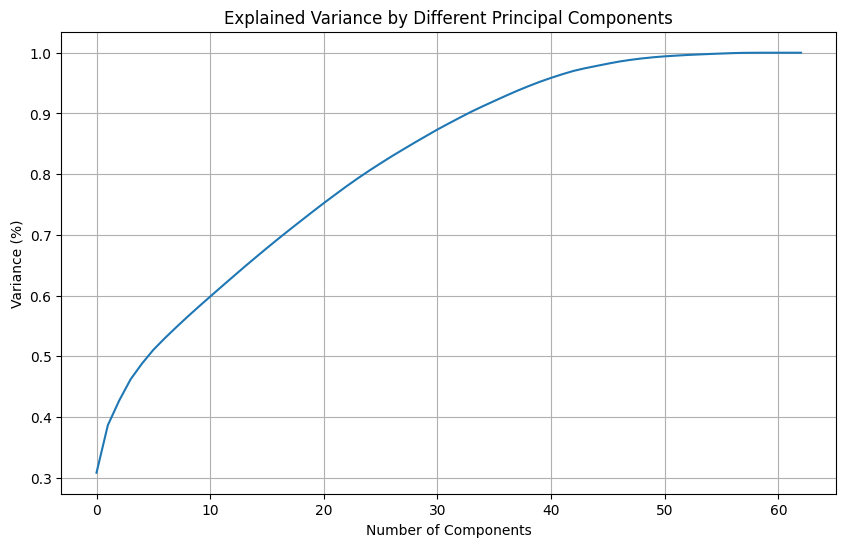

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming 'reviews_df' is a pre-defined DataFrame with numerical features

# Select all numeric columns
numerical_features = reviews_df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_features)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'reviews_df' is your DataFrame

# Select all numeric columns
numerical_features = reviews_df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Perform PCA with 40 components
pca = PCA(n_components=40)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
column_names = [f'PC{i+1}' for i in range(40)]  # Generates PC1, PC2, ..., PC40
pca_df = pd.DataFrame(data=principal_components, columns=column_names)



In [23]:
reviews_df_reset = reviews_df.reset_index(drop=True)
combined_df = pd.concat([reviews_df_reset, pca_df], axis=1)
combined_df.head()

,Unnamed: 0,category,rating,label,text_,sentiment,semantic_relevance,word_count,character_count,capitalized_count,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...",Positive,High Relevance,12,75,0,...,0.728202,0.006401,0.280228,-0.287937,0.882160,0.046707,0.187317,0.089769,0.261600,0.278248
1,1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...",Positive,High Relevance,16,80,0,...,0.412100,-0.381576,0.380889,-0.089709,0.582129,0.311664,0.282950,-0.028493,0.212799,0.178306
2,2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,Positive,High Relevance,14,67,0,...,0.322392,-0.191953,0.527067,-0.304462,0.019836,-0.148001,0.074558,-0.003148,0.045887,-0.008477
3,3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",Positive,Low Relevance,17,81,0,...,1.122882,-0.030093,0.309017,0.568731,0.121778,-0.395875,0.423160,-0.276112,0.481892,-0.182366
4,4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,Positive,High Relevance,18,85,0,...,0.618407,-0.278657,0.195943,0.028070,0.868029,0.114072,-0.018900,-0.605967,0.115912,0.362586


#Bag of Words on uncleaned data

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

bow_vect=CountVectorizer()

# On Uncleaned data
bow=bow_vect.fit_transform(combined_df['text_'].values)

In [25]:
bow

<16961x25616 sparse matrix of type '<class 'numpy.int64'>'
	with 657688 stored elements in Compressed Sparse Row format>

In [26]:
bow.shape

(16961, 25616)

#Tf-idf on uncleaned data

In [27]:
tfidf_vect=TfidfVectorizer()
tfidf=tfidf_vect.fit_transform(combined_df['text_'].values)

In [28]:
tfidf.shape

(16961, 25616)

# Bow on cleaned data


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vect = CountVectorizer()
bow = bow_vect.fit_transform(combined_df['CleanedText'].astype(str).values)

In [30]:
bow.shape

(16961, 22719)

In [31]:
#On 2000 data points
from sklearn.manifold import TSNE
X = bow[:2000, :].toarray()

In [32]:
tsne = TSNE(n_components = 2, perplexity = 20).fit_transform(X)
df = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df = pd.concat([df, combined_df['label'].iloc[:2000]], axis = 1)

Text(0.5, 1.0, 'Perplexity = 20')

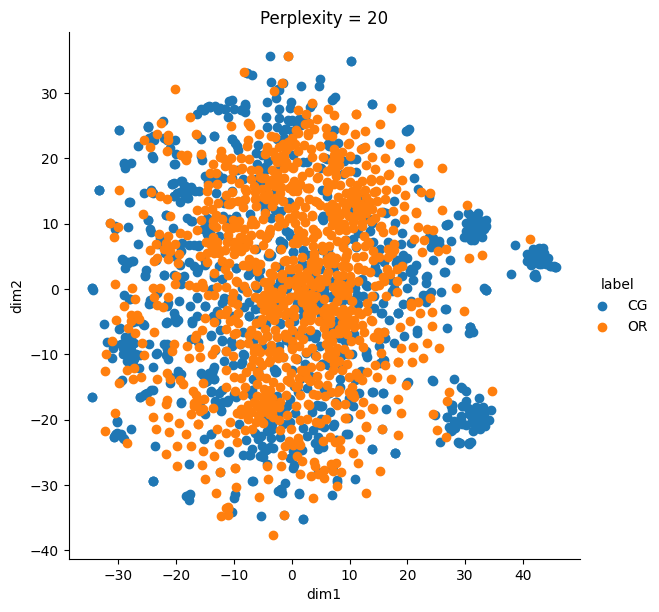

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.FacetGrid(df, hue = 'label', height = 6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('Perplexity = 20')

#TF-IDF on cleaned data


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
tfidf_vect=TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(combined_df['CleanedText'].astype(str).values)

In [35]:
tfidf.shape

(16961, 22719)

In [36]:
#On 2000 data points
Y = tfidf[:2000, :].toarray()

Text(0.5, 1.0, 'Perplexity = 20')

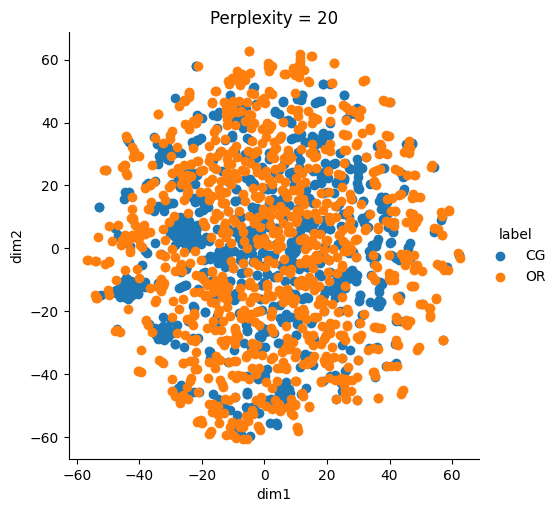

In [37]:
tsne = TSNE(n_components = 2, perplexity = 20).fit_transform(Y)
df1 = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df1 = pd.concat([df1, combined_df['label'].iloc[:2000]], axis = 1)
sns.FacetGrid(df1, hue = 'label', height = 5).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('Perplexity = 20')

#Applying Word2Vec

In [38]:
list_of_sent = []
for i in range(len(combined_df['CleanedText'])):
    list_of_sent.append(str(combined_df['CleanedText'][i]).split())

In [39]:
list_of_sent

[['love',
  'well',
  'made',
  'sturdy',
  'veri',
  'comfortable',
  'love',
  'veri',
  'pretti'],
 ['love', 'great', 'upgrad', 'original', 'v', 'mine', 'coupl', 'year'],
 ['thi', 'pillow', 'save', 'back', 'love', 'look', 'feel', 'thi', 'pillow'],
 ['miss', 'inform', 'use', 'great', 'product', 'price'],
 ['veri', 'nice', 'set', 'good', 'quality', 'set', 'two', 'month'],
 ['want', 'differ', 'flavor'],
 ['perfect', 'touch', 'onli', 'thing', 'wish', 'littl', 'space'],
 ['fit', 'well', 'look', 'great', 'love', 'smooth', 'edg', 'extra'],
 ['great', 'big', 'number', 'easi', 'read', 'onli', 'thing', 'like', 'size'],
 ['son', 'love', 'thi', 'comfort', 'veri', 'well', 'made', 'also', 'babi'],
 ['advertised', 'th', 'one', 'v', 'onli', 'problem', 'realli'],
 ['veri', 'handi', 'one', 'kid', 'tool', 'includ', 'package', 'one'],
 ['someon', 'say', 'orient', 'great', 'product'],
 ['flimsy', 'qualiti', 'would', 'expect', 'piec', 'furniture'],
 ['make', 'may', 'tea', 'stirring', 'onli', 'problem', '

In [40]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,vector_size=50, workers=-1)

In [41]:
words = list(w2v_model.wv.index_to_key)
print(len(words))

6209


In [42]:
def calc_avg_w2v(list_of_sent, w2v_model):
    sent_vectors = []
    for sent in list_of_sent:
        sent_vec = np.zeros(100)
        cnt_words = 0
        for word in sent:
            if word in w2v_model.wv:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    return sent_vectors

In [43]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5, workers=4)

In [44]:
import numpy as np
sent_vectors = calc_avg_w2v(list_of_sent, w2v_model)

In [48]:
sent_vectors

[array([-0.2524026 , -0.32901424,  0.29179751,  0.16503726,  0.25277194,
         0.06132161, -0.28094801,  0.25935284, -0.34972436, -1.27641128,
         0.45647364, -0.54797868,  0.7029312 ,  0.31436076, -0.47871603,
         0.05742097,  1.2540493 ,  0.83602905, -0.78506349, -0.6864426 ,
         0.50059092,  0.75981907,  0.17353036, -0.0803562 ,  0.0340928 ,
         0.99580628, -1.06738474,  1.80836638,  0.3158747 ,  1.4725835 ,
         1.3230998 ,  0.20134872,  0.31285435, -0.6638065 , -0.10925434,
         0.49658281,  0.8377949 , -0.46863052, -0.57186858,  2.13663027,
         0.56651533,  0.39760595, -0.58381573, -1.39912931,  1.30890046,
         0.39990686,  1.56100319,  0.13729983,  0.50639656, -0.55399919,
         0.00560356, -0.27559108,  0.881021  ,  0.86386362, -1.40105542,
         0.01442504,  0.53180658,  0.25502427,  0.69588884,  0.31585811,
         0.25094355, -0.76060056,  0.67793212,  0.00761383,  1.06945601,
         0.36952093,  1.17878635, -0.75858604,  0.8

In [45]:
combined_df.to_csv('final_data.csv')

combined df
category: The category of the product being reviewed

rating: Numerical rating given to the product

label: A label assigned to the review

text_: Original text of the product review.

lemmatized_text: The review text after lemmatization

stemmed_text: The review text after stemming

cleaned_text: Text after undergoing cleaning processes, like removing punctuation or special characters.

CleanedText: cleanedtext after removing STOPWORDS

sentiment: Categorical sentiment derived from the review text



PC1 PC2 - **PCA**

'flesch_reading_ease', 'flesch_kincaid_grade',
'gunning_fog', 'smog_index', 'automated_readability_index',
'coleman_liau_index', 'dale_chall_readability_score',
'sentiment_encoded', 'semantic_relevance_encoded' - **Readability Metrics**

'pos_counts', 'VB', 'DT', '.', 'RB', 'VBN', ',', 'JJ', 'CC', 'NN', 'VBP', 'PRP', 'IN', 'NNS', 'VBD', 'PRP$', 'VBG', 'WRB', 'TO', 'VBZ', 'CD', 'JJR', '``', '$', '''', 'MD', 'RP', 'WP', 'UH', ':', 'RBR', 'PDT', 'JJS', 'WDT', 'POS', 'NNP', 'SYM', 'EX', ')', 'RBS', 'FW', '(', '#', 'WP$', 'LS', 'NNPS' - **Part of Speech tags**

POS tags - https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk

In [ ]:
combined_df.columns

Index(['category', 'rating', 'label', 'text_', 'lemmatized_text',
       'stemmed_text', 'cleaned_text', 'CleanedText', 'sentiment',
       'semantic_relevance',
       ...
       'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39',
       'PC40'],
      dtype='object', length=110)

# Model Training

In [50]:
final_reviews_df = pd.read_csv('final_data.csv')

<ipython-input-50-e6f5c4dce722>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  final_reviews_df = pd.read_csv('final_data.csv')


In [51]:
from sklearn.preprocessing import LabelEncoder

numerical_features = final_reviews_df.select_dtypes(include=[np.number])


# Label encoding for labels
encoder = LabelEncoder()
encoder.fit(final_reviews_df['label'])
final_reviews_df['label'] = encoder.transform(final_reviews_df['label'])

# Select only categorical features
categorical_features = final_reviews_df[['category', 'sentiment', 'semantic_relevance']]


In [103]:
#one hot encoding
one_hot_encoded = pd.get_dummies(categorical_features, prefix=['category', 'sentiment', 'semantic_relevance'])
pca_columns = final_reviews_df.filter(regex='^PC\d+$')
pc_columns = [f'PC{i}' for i in range(1, 41)]
pca_columns[pc_columns] = pca_columns[pc_columns].apply(pd.to_numeric, errors='coerce')
pca_columns[pc_columns] = pca_columns[pc_columns].fillna(pca_columns[pc_columns].mean())

In [104]:
df_with_PCA = pd.concat([one_hot_encoded, pca_columns, final_reviews_df['label']], axis=1)
df_with_PCA.head()

,category_Books_5,category_Clothing_Shoes_and_Jewelry_5,category_Electronics_5,category_Home_and_Kitchen_5,category_Kindle_Store_5,category_Movies_and_TV_5,category_Pet_Supplies_5,category_Sports_and_Outdoors_5,category_Tools_and_Home_Improvement_5,category_Toys_and_Games_5,...,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,label
0,0,0,0,1,0,0,0,0,0,0,...,0.308768,-0.202177,-0.739403,0.028254,-0.010976,0.235394,0.095181,-0.452028,0.201406,0
1,0,0,0,1,0,0,0,0,0,0,...,0.213413,0.176341,-0.474192,-0.085330,0.001112,0.020152,-0.110937,-0.206826,0.223000,0
2,0,0,0,1,0,0,0,0,0,0,...,-0.151103,-0.010222,-0.314165,-0.264010,0.416031,0.054806,-0.159333,-0.205995,-0.041931,0
3,0,0,0,1,0,0,0,0,0,0,...,-0.001947,-0.301428,0.208358,0.287239,0.378855,0.788565,-0.125021,0.311197,0.459671,0
4,0,0,0,1,0,0,0,0,0,0,...,0.374438,0.207200,-0.318854,0.298486,0.158253,0.037593,-0.603673,-0.381826,0.342959,0


In [105]:
SEED = 0
train = df_with_PCA.sample(frac=0.8, random_state = SEED)
test = df_with_PCA.drop(train.index)

In [106]:
X_train = train.drop('label', axis=1)  # Features (excluding the 'label' column)
y_train = train['label']
X_test= test.drop('label', axis=1)
y_test= test['label']
X_train.head()

,category_Books_5,category_Clothing_Shoes_and_Jewelry_5,category_Electronics_5,category_Home_and_Kitchen_5,category_Kindle_Store_5,category_Movies_and_TV_5,category_Pet_Supplies_5,category_Sports_and_Outdoors_5,category_Tools_and_Home_Improvement_5,category_Toys_and_Games_5,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
5708,0,0,0,0,0,0,0,1,0,0,...,-0.746942,0.014849,-0.550897,0.099707,0.034630,0.676640,0.380929,0.252999,-0.309129,0.075473
36089,0,0,0,0,0,0,0,0,0,1,...,-0.923053,-0.973819,-1.126011,0.563051,-0.301764,-0.308604,0.085546,-0.342303,0.427691,-0.396882
16431,0,0,0,0,0,0,0,0,1,0,...,0.091794,0.061486,0.383059,-0.580175,0.036987,-0.393627,0.075932,0.055896,-0.199642,0.515786
5754,0,0,0,0,0,0,0,1,0,0,...,0.159760,0.226709,-0.809744,1.911942,0.768257,-0.572084,0.259430,0.305167,-0.276602,0.302384
8484,0,0,1,0,0,0,0,0,0,0,...,0.518875,-0.312672,0.132929,-0.518570,-0.350118,-0.108635,0.093372,0.277819,0.331219,0.186863


In [107]:
y_train.head()

5708     0
36089    0
16431    0
5754     1
8484     0
Name: label, dtype: int64

In [108]:
nan_counts = X_train.isna().sum()

# If you want the total count of NaN values in the entire DataFrame
total_nan_count = X_train.isna().sum().sum()
print(nan_counts)

print("\nTotal NaN count in the entire DataFrame:", total_nan_count)

category_Books_5                         0
category_Clothing_Shoes_and_Jewelry_5    0
category_Electronics_5                   0
category_Home_and_Kitchen_5              0
category_Kindle_Store_5                  0
category_Movies_and_TV_5                 0
category_Pet_Supplies_5                  0
category_Sports_and_Outdoors_5           0
category_Tools_and_Home_Improvement_5    0
category_Toys_and_Games_5                0
sentiment_Negative                       0
sentiment_Neutral                        0
sentiment_Positive                       0
semantic_relevance_High Relevance        0
semantic_relevance_Low Relevance         0
semantic_relevance_Medium Relevance      0
PC1                                      0
PC2                                      0
PC3                                      0
PC4                                      0
PC5                                      0
PC6                                      0
PC7                                      0
PC8        

In [96]:
for column in X_train.columns:
    unique_values = X_train[column].unique()
    print(f"Unique values in {column}:", unique_values)

Unique values in category_Books_5: [0 1]
Unique values in category_Clothing_Shoes_and_Jewelry_5: [0 1]
Unique values in category_Electronics_5: [0 1]
Unique values in category_Home_and_Kitchen_5: [0 1]
Unique values in category_Kindle_Store_5: [0 1]
Unique values in category_Movies_and_TV_5: [0 1]
Unique values in category_Pet_Supplies_5: [0 1]
Unique values in category_Sports_and_Outdoors_5: [1 0]
Unique values in category_Tools_and_Home_Improvement_5: [0 1]
Unique values in category_Toys_and_Games_5: [0 1]
Unique values in sentiment_Negative: [0 1]
Unique values in sentiment_Neutral: [0 1]
Unique values in sentiment_Positive: [1 0]
Unique values in semantic_relevance_High Relevance: [1 0]
Unique values in semantic_relevance_Low Relevance: [0 1]
Unique values in semantic_relevance_Medium Relevance: [0 1]
Unique values in PC1: [-1.0739596226593977 '1.0637112079891278' -1.3354689899781171 ...
 '2.546966000826345' -1.0850555183388009 0.0321503296365947]
Unique values in PC2: [-0.28629589

KeyError: ignored

# Ensemble Learning

Bagging with Random Forest

In [111]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=SEED)
param_grid = {
    'n_estimators': [100, 250],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : list(range(1,10)),
    'criterion' :['gini', 'entropy']
}
rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2, scoring='accuracy',return_train_score=False, verbose = 3)
rfc_model = rfc.fit(X_train, y_train)
print(rfc.cv_results_, rfc.best_params_, "\n", rfc.best_score_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV 1/2] END criterion=gini, max_depth=1, max_features=auto, n_estimators=100;, score=0.660 total time=   5.2s
[CV 2/2] END criterion=gini, max_depth=1, max_features=auto, n_estimators=100;, score=0.655 total time=   4.2s
[CV 1/2] END criterion=gini, max_depth=1, max_features=auto, n_estimators=250;, score=0.665 total time=  12.8s
[CV 2/2] END criterion=gini, max_depth=1, max_features=auto, n_estimators=250;, score=0.656 total time=  13.6s
[CV 1/2] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100;, score=0.660 total time=   3.2s
[CV 2/2] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100;, score=0.655 total time=   4.1s
[CV 1/2] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=250;, score=0.665 total time=   9.3s
[CV 2/2] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=250;, score=0.656 total time=   5.2s
[CV 1/2] END criterion=gini, max_depth=1, max_fea

In [112]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support as score, classification_report
y_pred = rfc.best_estimator_.predict(X_test)
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, support = score(y_test, y_pred, average='micro')
print("Precision:  {}".format(precision))
print("Recall:  {}".format( recall))
print("F1 score:  {}\n\n".format( fscore))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score is 0.7567675159235668
Precision:  0.7567675159235668
Recall:  0.7567675159235668
F1 score:  0.756767515923567


Classification report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77      3730
           1       0.79      0.71      0.75      3806

    accuracy                           0.76      7536
   macro avg       0.76      0.76      0.76      7536
weighted avg       0.76      0.76      0.76      7536



Boosting with ADA Boost

In [114]:
from sklearn.ensemble import AdaBoostClassifier
ada =AdaBoostClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
}
ada = GridSearchCV(ada, param_grid, cv=3, n_jobs=-1)
ada_model = ada.fit(X_train, y_train)

print(ada.cv_results_, ada.best_params_, "\n", ada.best_score_)

{'mean_fit_time': array([16.44087338, 28.54265126, 70.33040253, 18.47886117, 35.44279965,
       54.38050747, 14.39784344, 28.35973525, 51.85331273]), 'std_fit_time': array([1.90772673, 2.24040865, 6.81572387, 4.49293955, 4.06377314,
       0.9778824 , 0.32162693, 0.40746172, 8.40095258]), 'mean_score_time': array([0.18363365, 0.45909135, 0.93151164, 0.36521991, 0.27239752,
       0.85818378, 0.15064073, 0.27960658, 1.49982937]), 'std_score_time': array([0.04603967, 0.13900952, 0.29543154, 0.23791103, 0.02593063,
       0.10201015, 0.02432649, 0.01580411, 1.01770075]), 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[50, 100, 200, 50, 100, 200, 50, 100, 200],
             mask=[False, False, False, False, False, False, False, False,
                   False]

In [115]:
y_pred = ada.best_estimator_.predict(X_test)
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, support = score(y_test, y_pred, average='micro')
print("Precision:  {}".format(precision))
print("Recall:  {}".format( recall))
print("F1 score:  {}\n\n".format( fscore))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score is 0.7641985138004246
Precision:  0.7641985138004246
Recall:  0.7641985138004246
F1 score:  0.7641985138004246


Classification report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      3730
           1       0.78      0.74      0.76      3806

    accuracy                           0.76      7536
   macro avg       0.76      0.76      0.76      7536
weighted avg       0.77      0.76      0.76      7536



Boosting with XGBoost

In [116]:
!pip install xgboost

In [120]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': list(range(1,10)),
    'subsample': [0.8, 0.9, 1.0],
}

xgb_model = GridSearchCV(xgb_model, param_grid, cv=2, n_jobs=-1, verbose = 3)

# Fit the Grid Search to the training data
xgb_model_ = xgb_model.fit(X_train, y_train)
print(xgb_model.cv_results_, xgb_model.best_params_, "\n", xgb_model.best_score_)


Fitting 2 folds for each of 243 candidates, totalling 486 fits
{'mean_fit_time': array([ 0.54838371,  0.46269023,  0.57675159,  0.97481477,  1.11466038,
        1.60599351,  1.48618174,  0.84934723,  0.88338411,  0.55605698,
        0.713099  ,  0.64608383,  0.79063773,  0.71452522,  0.807459  ,
        1.60051906,  1.15439582,  2.29112339,  1.46271956,  1.11807716,
        1.02369428,  1.30555189,  0.94103765,  0.94830024,  2.22681594,
        1.66329086,  2.16417301,  1.27144694,  2.11495781,  1.6974436 ,
        1.48605525,  1.74449921,  1.51857138,  2.70713675,  3.26838851,
        4.82067847,  1.20751345,  1.49821436,  1.23648882,  2.38601243,
        2.10386169,  3.66984415,  5.47043395,  4.27906346,  5.10984051,
        3.03398395,  2.17693901,  1.96173441,  3.37154806,  5.17624724,
        4.31938207,  6.49136138,  9.02796507,  6.37914109,  4.14101088,
        3.93180251,  2.59497035,  5.0913372 ,  7.7318083 ,  4.99378943,
       12.01642549, 11.30077887,  9.52232361,  5.446464

In [121]:
y_pred = xgb_model.best_estimator_.predict(X_test)
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, support = score(y_test, y_pred, average='micro')
print("Precision:  {}".format(precision))
print("Recall:  {}".format( recall))
print("F1 score:  {}\n\n".format( fscore))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score is 0.8075902335456475
Precision:  0.8075902335456475
Recall:  0.8075902335456475
F1 score:  0.8075902335456475


Classification report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      3730
           1       0.82      0.79      0.81      3806

    accuracy                           0.81      7536
   macro avg       0.81      0.81      0.81      7536
weighted avg       0.81      0.81      0.81      7536



# Classification Algorithms

SVM

In [124]:
from sklearn.svm import SVC
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'kernel': ['rbf', 'poly', 'sigmoid']}

svc = GridSearchCV(SVC(), param_grid, cv=2, scoring='accuracy', verbose = 3)
svm_mod = svc.fit(X_train, y_train)
print(svc.cv_results_, svc.best_params_, "\n", svc.best_score_)

Fitting 2 folds for each of 21 candidates, totalling 42 fits
[CV 1/2] END ...............C=0.001, kernel=rbf;, score=0.502 total time=  51.5s
[CV 2/2] END ...............C=0.001, kernel=rbf;, score=0.502 total time=  49.9s
[CV 1/2] END ..............C=0.001, kernel=poly;, score=0.520 total time=  36.1s
[CV 2/2] END ..............C=0.001, kernel=poly;, score=0.511 total time=  33.2s
[CV 1/2] END ...........C=0.001, kernel=sigmoid;, score=0.509 total time=  53.1s
[CV 2/2] END ...........C=0.001, kernel=sigmoid;, score=0.504 total time=  52.2s
[CV 1/2] END ................C=0.01, kernel=rbf;, score=0.684 total time=  49.4s
[CV 2/2] END ................C=0.01, kernel=rbf;, score=0.678 total time=  48.8s
[CV 1/2] END ...............C=0.01, kernel=poly;, score=0.551 total time=  35.0s
[CV 2/2] END ...............C=0.01, kernel=poly;, score=0.543 total time=  32.6s
[CV 1/2] END ............C=0.01, kernel=sigmoid;, score=0.658 total time=  49.1s
[CV 2/2] END ............C=0.01, kernel=sigmoid;

In [125]:
y_pred = svc.best_estimator_.predict(X_test)
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, support = score(y_test, y_pred, average='micro')
print("Precision:  {}".format(precision))
print("Recall:  {}".format( recall))
print("F1 score:  {}\n\n".format( fscore))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score is 0.8099787685774947
Precision:  0.8099787685774947
Recall:  0.8099787685774947
F1 score:  0.8099787685774947


Classification report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81      3730
           1       0.83      0.78      0.81      3806

    accuracy                           0.81      7536
   macro avg       0.81      0.81      0.81      7536
weighted avg       0.81      0.81      0.81      7536




Multinominal Naive Bayes

In [127]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
alpha_value = 0.1
nb_model = MultinomialNB(alpha=alpha_value)
nb_model.fit(X_train_scaled, y_train)


MultinomialNB(alpha=0.1)

In [128]:
y_pred = nb_model.predict(X_test)
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, support = score(y_test, y_pred, average='micro')
print("Precision:  {}".format(precision))
print("Recall:  {}".format( recall))
print("F1 score:  {}\n\n".format( fscore))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score is 0.5666135881104034
Precision:  0.5666135881104034
Recall:  0.5666135881104034
F1 score:  0.5666135881104034


Classification report:
               precision    recall  f1-score   support

           0       0.55      0.75      0.63      3730
           1       0.61      0.39      0.48      3806

    accuracy                           0.57      7536
   macro avg       0.58      0.57      0.55      7536
weighted avg       0.58      0.57      0.55      7536



Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression
param_grid = {'penalty': ['l2', 'elasticnet'], 'C': [0.001,0.01,0.1,1,10,100]}
lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='accuracy',return_train_score=False, verbose = 1)
lr_model = lr.fit(X_train, y_train)
print(lr.cv_results_, lr.best_params_, "\n", lr.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'mean_fit_time': array([0.33584285, 0.02757668, 0.90104151, 0.04535298, 0.8158185 ,
       0.01159577, 1.78425007, 0.02147875, 2.51704431, 0.01119947,
       2.92503543, 0.04857893]), 'std_fit_time': array([8.95665789e-02, 3.90989395e-03, 2.24689606e-01, 8.43335216e-03,
       6.50729630e-01, 4.57162174e-04, 6.68495078e-01, 7.40844837e-03,
       9.14870758e-01, 2.19977648e-04, 1.19612413e+00, 2.76908874e-02]), 'mean_score_time': array([0.01736374, 0.        , 0.02125664, 0.        , 0.00836701,
       0.        , 0.01060696, 0.        , 0.01133218, 0.        ,
       0.00783195, 0.        ]), 'std_score_time': array([0.00382635, 0.        , 0.01023207, 0.        , 0.00353287,
       0.        , 0.00601388, 0.        , 0.00637251, 0.        ,
       0.00411201, 0.        ]), 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                   100],
             mask=[False, False, False, Fa

In [132]:
y_pred = lr.best_estimator_.predict(X_test)
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, support = score(y_test, y_pred, average='micro')
print("Precision:  {}".format(precision))
print("Recall:  {}".format( recall))
print("F1 score:  {}\n\n".format( fscore))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score is 0.7679140127388535
Precision:  0.7679140127388535
Recall:  0.7679140127388535
F1 score:  0.7679140127388535


Classification report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      3730
           1       0.78      0.75      0.77      3806

    accuracy                           0.77      7536
   macro avg       0.77      0.77      0.77      7536
weighted avg       0.77      0.77      0.77      7536

